In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_csv('../Data/ot.csv')

In [3]:
data.drop('Unnamed: 0',axis=1)

,invoice,stock_code,description,total_cost,invoice_date,price,quantity,customer_id,country
0,536370,21791,VINTAGE HEADS AND TAILS CARD GAME,30.00,2010-12-01 08:45:00,1.25,24,u12583,France
1,536373,82494L,WOODEN FRAME ANTIQUE WHITE,15.30,2010-12-01 09:02:00,2.55,6,u1785,United Kingdom
2,536378,21929,JUMBO BAG PINK VINTAGE PAISLEY,19.50,2010-12-01 09:37:00,1.95,10,u14688,United Kingdom
3,536381,37444A,YELLOW BREAKFAST CUP AND SAUCER,2.95,2010-12-01 09:41:00,2.95,1,u15311,United Kingdom
4,536381,15056BL,EDWARDIAN PARASOL BLACK,11.90,2010-12-01 09:41:00,5.95,2,u15311,United Kingdom
...,...,...,...,...,...,...,...,...,...
399836,581580,22698,PINK REGENCY TEACUP AND SAUCER,2.95,2011-12-09 12:20:00,2.95,1,u12748,United Kingdom
399837,581584,20832,RED FLOCK LOVE HEART PHOTO FRAME,51.84,2011-12-09 12:25:00,0.72,72,u13777,United Kingdom
399838,581585,22178,VICTORIAN GLASS HANGING T-LIGHT,23.40,2011-12-09 12:31:00,1.95,12,u15804,United Kingdom
399839,581585,84692,BOX OF 24 COCKTAIL PARASOLS,10.50,2011-12-09 12:31:00,0.42,25,u15804,United Kingdom


In [4]:
data['is_return'] = data['quantity']<0

In [5]:
# Reverse the effect of returns (if necessary)
data['net_quantity']=data['quantity'].abs()
data['net_revenue'] = data['price'].abs()

In [6]:
# Summarize data
total_quantity_sold = data[data['is_return'] == False]['net_quantity'].sum()
total_returns = data[data['is_return'] == True]['net_quantity'].sum()
net_revenue = data['net_revenue'].sum()

In [7]:
# Reporting
print(f"Total quantity sold: {total_quantity_sold}")
print(f"Total returns: {total_returns}")
print(f"Net revenue: ${net_revenue}")

Total quantity sold: 5155512
Total returns: 267712
Net revenue: $1180696.273


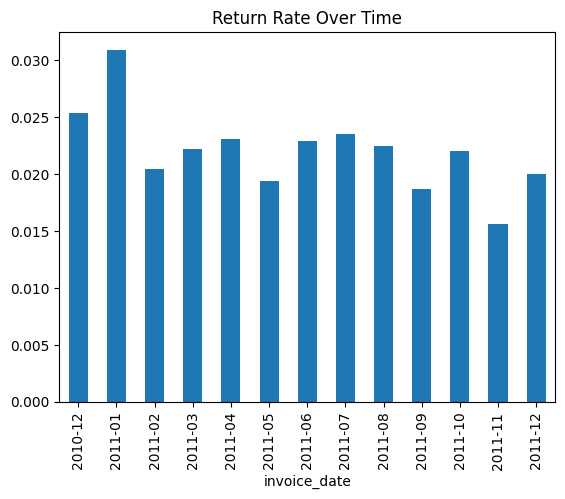

In [8]:
# Return rates over time (assuming we have a date field)
data['invoice_date'] = pd.to_datetime(data['invoice_date'])
data.groupby(data['invoice_date'].dt.to_period('M'))['is_return'].mean().plot(kind='bar')
plt.title('Return Rate Over Time')
plt.show()

Step 3: Data Integration, involves merging return transactions with the original sales data to ensure that the analysis accurately reflects the impact of returns. This is especially important if you need to match specific returns to their corresponding sales transactions.

Purpose of Data Integration
The goal is to link each return transaction with its original sales transaction to:

- Correctly attribute returns to the correct sale.
- Analyze the impact of returns on the original sales.
- Ensure accurate calculation of metrics like net sales, customer behavior, and product performance.

In [9]:
sales_df = data[data['quantity']>0]
return_df= data[data['quantity']<0]

In [10]:
sales_df.shape[0]

391334

In [11]:
return_df.shape[0]

8507

In [12]:
# Normalisation 
return_df['quantity'] = return_df['quantity'].abs()
return_df['price'] = return_df['price'].abs()

In [13]:
# match returns to sales 
merged_df = pd.merge(sales_df,return_df,on='invoice',how='left',suffixes=('_sale', '_return'))

In [14]:
merged_df.drop('Unnamed: 0_sale',axis=1)

,invoice,stock_code_sale,description_sale,total_cost_sale,invoice_date_sale,price_sale,quantity_sale,customer_id_sale,country_sale,is_return_sale,...,description_return,total_cost_return,invoice_date_return,price_return,quantity_return,customer_id_return,country_return,is_return_return,net_quantity_return,net_revenue_return
0,536370,21791,VINTAGE HEADS AND TAILS CARD GAME,30.00,2010-12-01 08:45:00,1.25,24,u12583,France,False,...,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,536373,82494L,WOODEN FRAME ANTIQUE WHITE,15.30,2010-12-01 09:02:00,2.55,6,u1785,United Kingdom,False,...,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,536378,21929,JUMBO BAG PINK VINTAGE PAISLEY,19.50,2010-12-01 09:37:00,1.95,10,u14688,United Kingdom,False,...,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,536381,37444A,YELLOW BREAKFAST CUP AND SAUCER,2.95,2010-12-01 09:41:00,2.95,1,u15311,United Kingdom,False,...,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,536381,15056BL,EDWARDIAN PARASOL BLACK,11.90,2010-12-01 09:41:00,5.95,2,u15311,United Kingdom,False,...,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
391329,581580,22698,PINK REGENCY TEACUP AND SAUCER,2.95,2011-12-09 12:20:00,2.95,1,u12748,United Kingdom,False,...,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
391330,581584,20832,RED FLOCK LOVE HEART PHOTO FRAME,51.84,2011-12-09 12:25:00,0.72,72,u13777,United Kingdom,False,...,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
391331,581585,22178,VICTORIAN GLASS HANGING T-LIGHT,23.40,2011-12-09 12:31:00,1.95,12,u15804,United Kingdom,False,...,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
391332,581585,84692,BOX OF 24 COCKTAIL PARASOLS,10.50,2011-12-09 12:31:00,0.42,25,u15804,United Kingdom,False,...,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
# Handle multiple returns 
returns_grouped_df = return_df.groupby('invoice').agg({
    'quantity': 'sum',
    'price': 'sum'
}).reset_index()
merged_df = pd.merge(sales_df, returns_grouped_df, on='invoice', how='left', suffixes=('_sale', '_return'))

In [16]:
returns_grouped_df

,invoice,quantity,price
0,C536383,1,4.65
1,C536391,132,9.27
2,C536506,6,4.25
3,C536543,3,2.95
4,C536548,40,49.45
...,...,...,...
3378,C581470,4,2.08
3379,C581484,80995,2.08
3380,C581490,23,2.78
3381,C581568,5,10.95


In [17]:
merged_df.drop('Unnamed: 0',axis=1)

,invoice,stock_code,description,total_cost,invoice_date,price_sale,quantity_sale,customer_id,country,is_return,net_quantity,net_revenue,quantity_return,price_return
0,536370,21791,VINTAGE HEADS AND TAILS CARD GAME,30.00,2010-12-01 08:45:00,1.25,24,u12583,France,False,24,1.25,NaN,NaN
1,536373,82494L,WOODEN FRAME ANTIQUE WHITE,15.30,2010-12-01 09:02:00,2.55,6,u1785,United Kingdom,False,6,2.55,NaN,NaN
2,536378,21929,JUMBO BAG PINK VINTAGE PAISLEY,19.50,2010-12-01 09:37:00,1.95,10,u14688,United Kingdom,False,10,1.95,NaN,NaN
3,536381,37444A,YELLOW BREAKFAST CUP AND SAUCER,2.95,2010-12-01 09:41:00,2.95,1,u15311,United Kingdom,False,1,2.95,NaN,NaN
4,536381,15056BL,EDWARDIAN PARASOL BLACK,11.90,2010-12-01 09:41:00,5.95,2,u15311,United Kingdom,False,2,5.95,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
391329,581580,22698,PINK REGENCY TEACUP AND SAUCER,2.95,2011-12-09 12:20:00,2.95,1,u12748,United Kingdom,False,1,2.95,NaN,NaN
391330,581584,20832,RED FLOCK LOVE HEART PHOTO FRAME,51.84,2011-12-09 12:25:00,0.72,72,u13777,United Kingdom,False,72,0.72,NaN,NaN
391331,581585,22178,VICTORIAN GLASS HANGING T-LIGHT,23.40,2011-12-09 12:31:00,1.95,12,u15804,United Kingdom,False,12,1.95,NaN,NaN
391332,581585,84692,BOX OF 24 COCKTAIL PARASOLS,10.50,2011-12-09 12:31:00,0.42,25,u15804,United Kingdom,False,25,0.42,NaN,NaN


In [18]:
# calculate net values 
merged_df['net_quantity'] = merged_df['quantity_sale'] - merged_df['quantity_return'].fillna(0)
merged_df['net_revenue'] = merged_df['price_sale'] - merged_df['price_return'].fillna(0)

In [19]:
merged_df.head()

,Unnamed: 0,invoice,stock_code,description,total_cost,invoice_date,price_sale,quantity_sale,customer_id,country,is_return,net_quantity,net_revenue,quantity_return,price_return
0,0,536370,21791,VINTAGE HEADS AND TAILS CARD GAME,30.00,2010-12-01 08:45:00,1.25,24,u12583,France,False,24.0,1.25,NaN,NaN
1,1,536373,82494L,WOODEN FRAME ANTIQUE WHITE,15.30,2010-12-01 09:02:00,2.55,6,u1785,United Kingdom,False,6.0,2.55,NaN,NaN
2,2,536378,21929,JUMBO BAG PINK VINTAGE PAISLEY,19.50,2010-12-01 09:37:00,1.95,10,u14688,United Kingdom,False,10.0,1.95,NaN,NaN
3,3,536381,37444A,YELLOW BREAKFAST CUP AND SAUCER,2.95,2010-12-01 09:41:00,2.95,1,u15311,United Kingdom,False,1.0,2.95,NaN,NaN
4,4,536381,15056BL,EDWARDIAN PARASOL BLACK,11.90,2010-12-01 09:41:00,5.95,2,u15311,United Kingdom,False,2.0,5.95,NaN,NaN


In [20]:
total_quantities_sold= merged_df['net_quantity'].sum()
total_revenue_generated=merged_df['net_revenue'].sum()

In [21]:
print(f"total quantities sold : {total_quantities_sold}")
print(f"total revenue generated:${total_revenue_generated}")

total quantities sold : 5155512.0
total revenue generated:$1142878.373


In [27]:
# Returns over product 
sales_count=sales_df.groupby('stock_code').size()
return_count=return_df.groupby('stock_code').size()
return_rate = (return_count / sales_count).fillna(0)

In [28]:
print(return_rate)

stock_code
10002     0.000000
10080     0.000000
10120     0.000000
10123C    0.000000
10124A    0.000000
            ...   
90214Y    0.000000
90214Z    0.000000
C2        0.007519
DOT       0.000000
PADS      0.000000
Length: 3679, dtype: float64
